In [24]:
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline 

In [25]:
f = xr.open_dataarray("TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.nc")

In [26]:
print(f)

<xarray.DataArray 'thetao' (time: 12053)>
array([14.696689, 14.670896, 14.636758, ..., 16.363058, 16.206219, 16.10329 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 ...


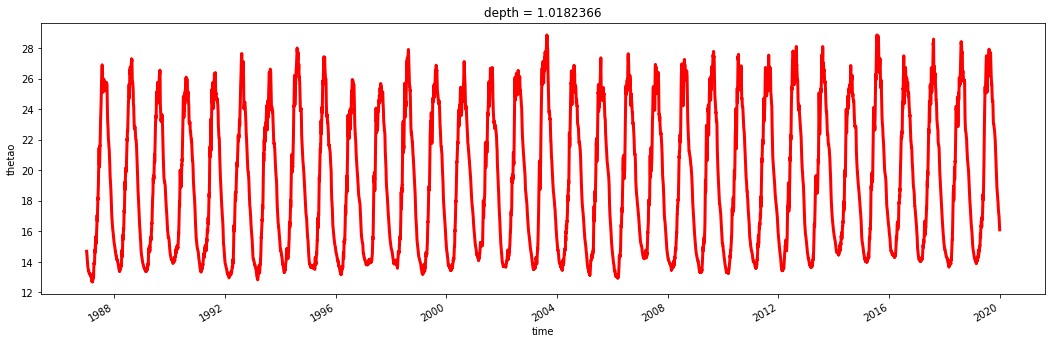

In [27]:
f.plot.line(color="r",linewidth=3, figsize=(18,5))

In [28]:
fy_dt = f.groupby('time.year').mean()
fy_dt

<xarray.DataArray 'thetao' (year: 33)>
array([18.70043 , 18.948826, 18.506943, 19.039728, 18.59656 , 18.738802,
       18.85174 , 19.363033, 18.667519, 18.384945, 18.72798 , 19.058851,
       19.302797, 19.389723, 19.37243 , 19.198406, 19.869411, 19.256685,
       19.073353, 19.137104, 19.355413, 19.27729 , 19.320189, 19.044146,
       19.537188, 19.791483, 19.578949, 19.671581, 19.95234 , 19.650772,
       19.577301, 20.01605 , 19.934917], dtype=float32)
Coordinates:
    depth    float32 1.018
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019

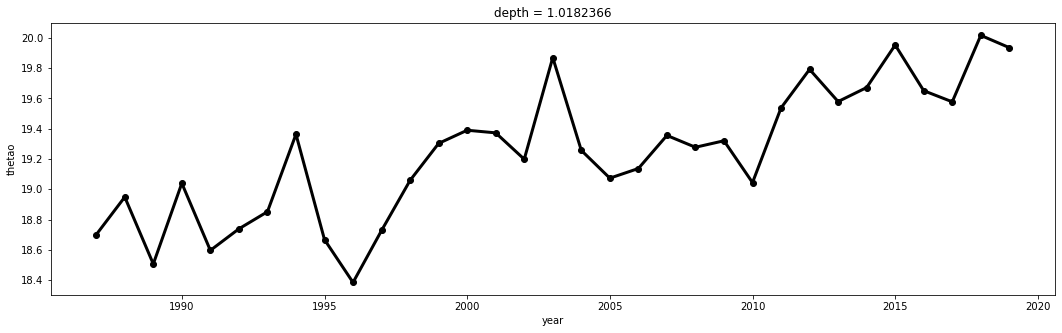

In [29]:
fy_dt.plot.line(color="k",linewidth=3,marker='o', figsize=(18,5))

In [30]:
fm_dt = f.groupby('time.month').mean()
fm_dt

<xarray.DataArray 'thetao' (month: 12)>
array([14.533921 , 13.794261 , 13.8592615, 15.053479 , 18.20389  ,
       22.295887 , 25.222841 , 26.325382 , 24.487059 , 21.706154 ,
       18.808342 , 16.213816 ], dtype=float32)
Coordinates:
    depth    float32 1.018
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [31]:
roller_m = fm_dt.rolling(month=12,center=True)
roller_m

DataArrayRolling [month->12(center)]

In [32]:
roller_m.mean()

<xarray.DataArray 'thetao' (month: 12)>
array([     nan,      nan,      nan,      nan,      nan,      nan,
       19.20869,      nan,      nan,      nan,      nan,      nan],
      dtype=float32)
Coordinates:
    depth    float32 1.018
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [33]:
roller_mm=roller_m.construct("window_dim")
print(roller_mm)

<xarray.DataArray 'thetao' (month: 12, window_dim: 12)>
array([[       nan,        nan,        nan,        nan,        nan,
               nan, 14.533921 , 13.794261 , 13.8592615, 15.053479 ,
        18.20389  , 22.295887 ],
       [       nan,        nan,        nan,        nan,        nan,
        14.533921 , 13.794261 , 13.8592615, 15.053479 , 18.20389  ,
        22.295887 , 25.222841 ],
       [       nan,        nan,        nan,        nan, 14.533921 ,
        13.794261 , 13.8592615, 15.053479 , 18.20389  , 22.295887 ,
        25.222841 , 26.325382 ],
       [       nan,        nan,        nan, 14.533921 , 13.794261 ,
        13.8592615, 15.053479 , 18.20389  , 22.295887 , 25.222841 ,
        26.325382 , 24.487059 ],
       [       nan,        nan, 14.533921 , 13.794261 , 13.8592615,
        15.053479 , 18.20389  , 22.295887 , 25.222841 , 26.325382 ,
        24.487059 , 21.706154 ],
       [       nan, 14.533921 , 13.794261 , 13.8592615, 15.053479 ,
        18.20389  , 22.295887 ,

In [34]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [35]:
width_inch = 18
height_inch = 5

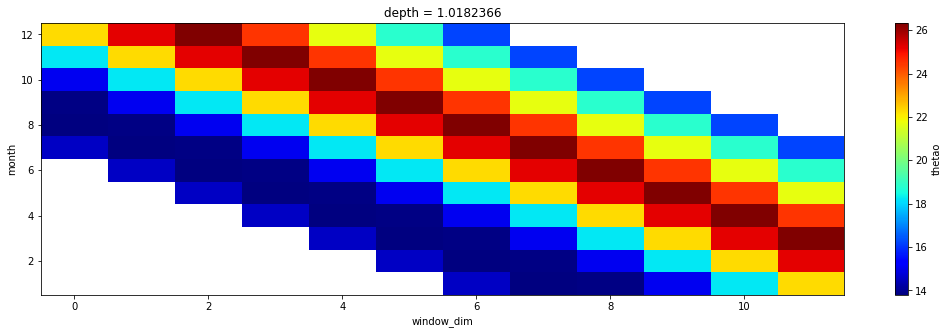

In [36]:
roller_mm.plot(figsize=(width_inch, height_inch),cmap=plt.cm.jet)

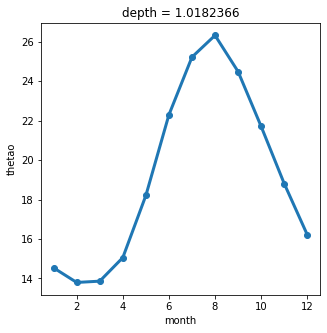

In [37]:
roller_mmm = roller_mm.isel( window_dim=6)
roller_mmm.plot(linewidth=3,marker='o',figsize=(5,5))